In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import pandas as pd
from urllib.request import urlopen
import scipy.optimize
import random
from collections import defaultdict
import nltk
import string
from nltk.stem.porter import *
from nltk import word_tokenize 
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Loading and Preprocessing


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/'

drug = pd.read_csv(path+"drugsCom_pro.csv")

In [4]:
drug = drug.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
drug.head()


,Unnamed: 0.1.1,drugName,condition,review,rating,date,usefulCount,pre_review
0,159862,Bactrim,Urinary Tract Infection,"""Took Bactrim for 3 days. Cleared up the urina...",5.0,"July 29, 2013",101,"[['took', 'bactrim', 'days', 'cleared', 'urina..."
1,217620,Clarithromycin,Sinusitis,"""I was prescribed this medicine for sinus and ...",1.0,"December 1, 2009",13,"[['prescribed', 'medicine', 'sinus', 'flu', 'l..."
2,85750,Ethinyl estradiol / norgestimate,Birth Control,"""I&#039;ve been on this pill for over three mo...",5.0,"November 15, 2013",11,"[['pill', 'three', 'months', 'tri', 'spintec',..."
3,4852,Belviq,Obesity,"""I tried Belviq for Two weeks great med but no...",6.0,"December 9, 2015",10,"[['tried', 'belviq', 'two', 'weeks', 'great', ..."
4,184456,Hydroxyzine,Anxiety,"""This medicine only stops the physical effects...",2.0,"March 27, 2011",53,"[['medicine', 'stops', 'physical', 'effects', ..."


In [0]:
# drug['pre_review'] = ''

In [0]:
# ## Preprocessing: tokenize and remove stopwords

# pro_review = []

# for i in range(0, len(drug['review'])):
#   # print(drug['review'][i])
#   # Cleaing the text
#   processed_review = drug['review'][i].lower()
#   processed_review = re.sub('[^a-zA-Z]', ' ', processed_review )
#   processed_review = re.sub(r'\s+', ' ', processed_review)

#   all_sentences = nltk.sent_tokenize(processed_review)

#   all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

#   # Removing Stop Words

#   for j in range(len(all_words)):
#     all_words[j] = [w for w in all_words[j] if w not in stopwords.words('english')]

#   drug['pre_review'][i] = all_words
#   # print(drug['pre_review'][i])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
# drug.to_csv(path+'drugsComTrain_processed.csv')

In [5]:
pre_review = drug['pre_review'].str.lower().str.split()
drug['review_length'] = pre_review.apply(len)

drug['pre_review'] = drug['pre_review'].str.lower().str.split()

drug.head()

,Unnamed: 0.1.1,drugName,condition,review,rating,date,usefulCount,pre_review,review_length
0,159862,Bactrim,Urinary Tract Infection,"""Took Bactrim for 3 days. Cleared up the urina...",5.0,"July 29, 2013",101,"[[['took',, 'bactrim',, 'days',, 'cleared',, '...",20
1,217620,Clarithromycin,Sinusitis,"""I was prescribed this medicine for sinus and ...",1.0,"December 1, 2009",13,"[[['prescribed',, 'medicine',, 'sinus',, 'flu'...",18
2,85750,Ethinyl estradiol / norgestimate,Birth Control,"""I&#039;ve been on this pill for over three mo...",5.0,"November 15, 2013",11,"[[['pill',, 'three',, 'months',, 'tri',, 'spin...",35
3,4852,Belviq,Obesity,"""I tried Belviq for Two weeks great med but no...",6.0,"December 9, 2015",10,"[[['tried',, 'belviq',, 'two',, 'weeks',, 'gre...",12
4,184456,Hydroxyzine,Anxiety,"""This medicine only stops the physical effects...",2.0,"March 27, 2011",53,"[[['medicine',, 'stops',, 'physical',, 'effect...",25


In [6]:
## Assign label to ratings
def get_rating(rating):
  if rating < 7:
    return 0
  # elif rating < 8:
  #   return 1
  else:
    return 1

drug['pre_rating'] = drug['rating'].apply(get_rating)
drug.head()

,Unnamed: 0.1.1,drugName,condition,review,rating,date,usefulCount,pre_review,review_length,pre_rating
0,159862,Bactrim,Urinary Tract Infection,"""Took Bactrim for 3 days. Cleared up the urina...",5.0,"July 29, 2013",101,"[[['took',, 'bactrim',, 'days',, 'cleared',, '...",20,0
1,217620,Clarithromycin,Sinusitis,"""I was prescribed this medicine for sinus and ...",1.0,"December 1, 2009",13,"[[['prescribed',, 'medicine',, 'sinus',, 'flu'...",18,0
2,85750,Ethinyl estradiol / norgestimate,Birth Control,"""I&#039;ve been on this pill for over three mo...",5.0,"November 15, 2013",11,"[[['pill',, 'three',, 'months',, 'tri',, 'spin...",35,0
3,4852,Belviq,Obesity,"""I tried Belviq for Two weeks great med but no...",6.0,"December 9, 2015",10,"[[['tried',, 'belviq',, 'two',, 'weeks',, 'gre...",12,0
4,184456,Hydroxyzine,Anxiety,"""This medicine only stops the physical effects...",2.0,"March 27, 2011",53,"[[['medicine',, 'stops',, 'physical',, 'effect...",25,0


In [7]:
drug.groupby(['rating']).count()

,Unnamed: 0.1.1,drugName,condition,review,date,usefulCount,pre_review,review_length,pre_rating
rating,,,,,,,,,
1.0,9956,9956,9902,9956,9956,9956,9956,9956,9956
2.0,3168,3168,3145,3168,3168,3168,3168,3168,3168
3.0,2993,2993,2967,2993,2993,2993,2993,2993,2993
4.0,2315,2315,2304,2315,2315,2315,2315,2315,2315
5.0,3680,3680,3665,3680,3680,3680,3680,3680,3680
6.0,2888,2888,2870,2888,2888,2888,2888,2888,2888
7.0,2173,2173,2160,2173,2173,2173,2173,2173,2173
8.0,4547,4547,4523,4547,4547,4547,4547,4547,4547
9.0,6415,6415,6384,6415,6415,6415,6415,6415,6415


In [0]:
select_indices = list(np.where(drug['review_length'] == 937)[0])
te = drug.iloc[select_indices]['review']
drug['review'][8120]

'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

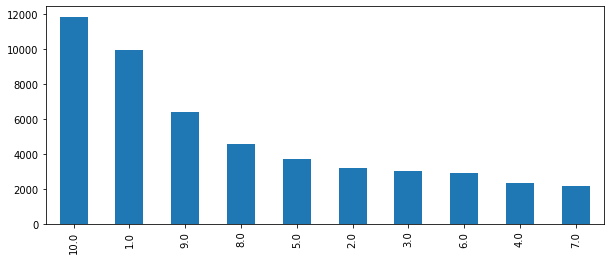

In [0]:
plt.figure(figsize=(10,4))
drug.rating.value_counts().plot(kind='bar')

# WordEmbedding and Feature Extraction


## Word Embedding

In [0]:
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
embedding_model = api.load("glove-twitter-50")  # download the model and return as object ready for use
# embedding_model.most_similar("cat")

[==================================================] 100.0% 199.5/199.5MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## POS Tagging

In [0]:
import nltk
import sys
nltk.download('brown')
nltk.download('punkt')

from nltk.corpus import brown
from nltk.corpus import treebank
from nltk import word_tokenize
from nltk.tag import hmm

brown_tagged_sents = brown.tagged_sents()

# Import HMM module

# Setup a trainer with default(None) values
# And train with the data
trainer = hmm.HiddenMarkovModelTrainer()
pos_tagger = trainer.train_supervised(brown_tagged_sents)

print (pos_tagger)
# Prints the basic data about the tagger

tokens = word_tokenize("This race is awesome , I want to race too ! What do you think ?")
print(pos_tagger.tag(tokens))


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<HiddenMarkovModelTagger 472 states and 56057 output symbols>
[('This', 'DT'), ('race', 'NN'), ('is', 'BEZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PPSS'), ('want', 'VB'), ('to', 'TO'), ('race', 'VB'), ('too', 'RB'), ('!', 'AT'), ('What', 'AT'), ('do', 'AT'), ('you', 'AT'), ('think', 'AT'), ('?', 'AT')]


## Lexicon Sentiment Score

In [0]:
from textblob import TextBlob
statement = "expensive tablet"
sentiment1 = TextBlob(statement).sentiment

In [0]:
def senti(x):
    return TextBlob(x).sentiment[0]

# Generate Input For Networks

In [0]:
#a dictionary with review id as key, and all the words as value
id_review_dict = {}

for index, row in drug.iterrows():
  review_id = row['Unnamed: 0.1.1']
  review_content = row['pre_review']
  id_review_dict[review_id] = review_content

# id_review_dict[184456]  

In [0]:
temp = []
for word in (id_review_dict[184456]):
  word = re.sub('[^a-zA-Z]', ' ', word).strip()
  temp.append(embedding_model[word])

temp

In [0]:
#count the maximum number of words in a single doducment
max_input_length = max(drug['review_length'])
print('Max input length is: ', max_input_length)


Max input length is:  937


In [0]:
#dictionary with review id as key and the word sentiment score of the whole review.
review_lexicon_dict = {}

for key in id_review_dict:
  str1 = ''.join(id_review_dict[key])
  review_lexicon_dict[key] = senti(str1)

len(review_lexicon_dict)

50000

In [0]:
review_lexicon_dict[217620]

0.17142857142857143

In [0]:
#dictionary with review id as key and the word embeddings of each words in it as value.
review_embedding_dict = {}

for key in id_review_dict:
  temp_embedding = []
  for word in id_review_dict[key]:
    word = re.sub('[^a-zA-Z]', ' ', word).strip()
    try:
      temp_embedding.append(embedding_model[word])
    except:
      temp_embedding.append(np.zeros(50))

  temp_embedding.append(np.full((50), review_lexicon_dict[key]))

  review_embedding_dict[key] = temp_embedding

In [0]:
len(review_embedding_dict[217620])

18

# Model

## SGDClassifier

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(drug['review'], drug['pre_rating'], test_size=0.2, random_state=42)

In [0]:
## Using Linear SVM

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                # ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=3000, tol=None)),
                ('clf', SGDClassifier(loss='hinge', random_state=42, tol=None)),
               ])

parameteres = {'clf__alpha':[1e-3,1e-2,1e-1,1,10], 'clf__max_iter':[1000,2000,3000], 'clf__penalty':['l1','l2']}

grid = GridSearchCV(sgd, param_grid=parameteres)
# sgd.fit(X_train, y_train)

# y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))


In [13]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


score = 0.78
{'clf__alpha': 0.001, 'clf__max_iter': 1000, 'clf__penalty': 'l2'}


## LSTM

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
X = list(review_embedding_dict.values())
y = drug['pre_rating']

print(len(X))
print(len(y))

50000
50000


In [0]:
# y = drug['rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=max_input_length+1)
X_test = sequence.pad_sequences(X_test, maxlen=max_input_length+1)

In [0]:
embedding_vecor_length = 50
data_size = 50000
max_input = max_input_length+1

model = Sequential()
model.add(LSTM(100,input_shape=(max_input, embedding_vecor_length)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 60,804
Trainable params: 60,804
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 718s 18ms/step - loss: 1.0159 - acc: 0.4919 - val_loss: 0.9901 - val_acc: 0.5280
Epoch 2/10
40000/40000 [==============================] - 641s 16ms/step - loss: 0.9358 - acc: 0.5768 - val_loss: 0.9175 - val_acc: 0.5881
Epoch 3/10
40000/40000 [==============================] - 575s 14ms/step - loss: 0.8955 - acc: 0.6029 - val_loss: 0.9047 - val_acc: 0.5910
Epoch 4/10
40000/40000 [==============================] - 575s 14ms/step - loss: 0.8625 - acc: 0.6189 - val_loss: 0.8629 - val_acc: 0.6219
Epoch 5/10
40000/40000 [==============================] - 575s 14ms/step - loss: 0.8360 - acc: 0.6357 - val_loss: 0.8459 - val_acc: 0.6358
Epoch 6/10
40000/40000 [==============================] - 572s 14ms/step - loss: 0.8122 - acc: 0.6482 - val_loss: 0.8373 - val_acc: 0.6409
Epoch 7/10
40000/40000 [==============================] - 575s 14ms/step - loss: 0.7892 - acc: 0.6603 - val_loss: 0.

In [0]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

embedding_vecor_length = 50
data_size = 50000
max_input = max_input_length+1

model = Sequential()
model.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100,input_shape=(max_input, embedding_vecor_length)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train.values, validation_data=(X_test, y_test), epochs=20, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test.values, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/20





40000/40000 [==============================] - 456s 11ms/step - loss: 0.6227 - acc: 0.6516 - val_loss: 0.5855 - val_acc: 0.6852
Epoch 2/20
40000/40000 [==============================] - 454s 11ms/step - loss: 0.5674 - acc: 0.7033 - val_loss: 0.5532 - val_acc: 0.7166
Epoch 3/20
40000/40000 [==============================] - 448s 11ms/step - loss: 0.5371 - acc: 0.7274 - val_loss: 0.5419 - val_acc: 0.7226
Epoch 4/20
40000/40000 [==============================] - 447s 11ms/step - loss: 0.5141 - acc: 0.7464 - val_loss: 0.5389 - val_acc: 0.7263
Epoch 5/20
40000/40000 [==============================] - 448s 11ms/step - loss: 0.4863 - acc: 0.7651 - val_loss: 0.5459 - val_acc: 0.7242
Epoch 6/20
40000/40000 [========

## Doc2Vec with Logistic Regression

In [24]:
df = drug[['pre_review', 'pre_rating']]
df.head()

,pre_review,pre_rating
0,"[[['took',, 'bactrim',, 'days',, 'cleared',, '...",0
1,"[[['prescribed',, 'medicine',, 'sinus',, 'flu'...",0
2,"[[['pill',, 'three',, 'months',, 'tri',, 'spin...",0
3,"[[['tried',, 'belviq',, 'two',, 'weeks',, 'gre...",0
4,"[[['medicine',, 'stops',, 'physical',, 'effect...",0


In [0]:
## add tags to each review

import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument

train, test = train_test_split(df, test_size=0.3, random_state=42)

train_tagged = train.apply(
    lambda r: TaggedDocument(words=(r['pre_review']), tags=[r.pre_rating]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=(r['pre_review']), tags=[r.pre_rating]), axis=1)

In [0]:
train_tagged[38094]

TaggedDocument(words="[['taken', 'three', 'days', 'hot', 'flashes', 'stopped', 'within', 'hrs', 'fantastic']]", tags=[10.0])

In [0]:
import multiprocessing
cores = multiprocessing.cpu_count()

If dm=0, distributed bag of words (PV-DBOW) is used; if dm=1,‘distributed memory’ (PV-DM) is used.

300- dimensional feature vectors.

min_count=2, ignores all words with total frequency lower than this.

negative=5, specifies how many “noise words” should be drawn.

hs=0, and negative is non-zero, negative sampling will be used.

sample=0, the threshold for configuring which higher-frequency words are randomly down sampled.

workers=cores, use these many worker threads to train the model (=faster training with multicore machines).

In [0]:
from gensim.models import Doc2Vec
from tqdm import tqdm

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 35000/35000 [00:00<00:00, 1612573.63it/s]


In [0]:
from sklearn import utils

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 35000/35000 [00:00<00:00, 1823157.48it/s]


In [0]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [0]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy 0.5072
Testing F1 score: 0.5071156040214638


In [0]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 35000/35000 [00:00<00:00, 1504598.23it/s]


In [0]:
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 35000/35000 [00:00<00:00, 1577110.93it/s]


In [0]:
!pip install testfixtures
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

     |████████████████████████████████| 92kB 2.8MB/s 


In [0]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [0]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy 0.5726666666666667
Testing F1 score: 0.5726432657541131
